In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x=pd.read_csv("https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/5.%20K-Nearest%20Neighbours/train.csv")
x.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(x.shape)
print(x.columns)

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
data=x.values
Y=data[:,0]
X=data[:,1:]
print(X.shape)
print(Y.shape)
print(X[:5,:])

(42000, 784)
(42000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
split=int(0.8*(X.shape[0]))
xtrain=X[:split,:]
xtest=X[split:,:]
ytrain=Y[:split]
ytest=Y[split:]
print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)

(8400, 784)
(33600, 784)
(8400,)
(33600,)



0


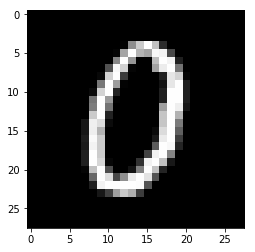

In [6]:
#visualising a sample
def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
drawimg(xtrain[5])
print()
print(ytrain[5])


In [10]:
#KNN
def dist(x,y):
    dist=np.sqrt(sum((x-y)**2))
    return dist
def knn(x,y,query,k=5):
    d=[]
    for i in range(x.shape[0]):
        d.append((dist(x[i],query),y[i]))
    d.sort()
    d=d[:k]
    d=np.array(d)
    val=np.unique(d[:,1],return_counts=True)
    index=val[1].argmax()
    pred=val[0][index]
    return pred
        
    

In [11]:
acc=0
m=xtest.shape[0]
for i in range(m):
    pred=knn(xtrain,ytrain,xtest[i])
    if(pred==ytest[i]):
        acc+=1
print(acc/10)

0.9


In [9]:
pred=knn(xtrain,ytrain,xtest[1])
print("predicted is %d" %pred)
print("actual is %d" %ytest[1])


[[1145.78095638    7.        ]
 [1150.19346199    7.        ]
 [1171.67572306    7.        ]
 [1215.04032855    7.        ]
 [1280.82590542    7.        ]]
predicted is 7
actual is 7
